In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from collections import defaultdict
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt


In [2]:

data = pd.read_csv("data/CATSnDOGS.csv")
labels = pd.read_csv("data/labels.csv")

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [36]:
# underfit

rf = RandomForestClassifier(n_estimators=1, max_depth=1)
rf.fit(X_train, y_train["x"].ravel())
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)
print("F1 Train:", f1_score(y_train, y_pred_train))
print("F1 Test:", f1_score(y_test, y_pred))


print(f"Accuracy Train: {accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy Test: {accuracy_score(y_test, y_pred)}")


F1 Train: 0.7142857142857143
F1 Test: 0.5490196078431373
Accuracy Train: 0.620253164556962
Accuracy Test: 0.425


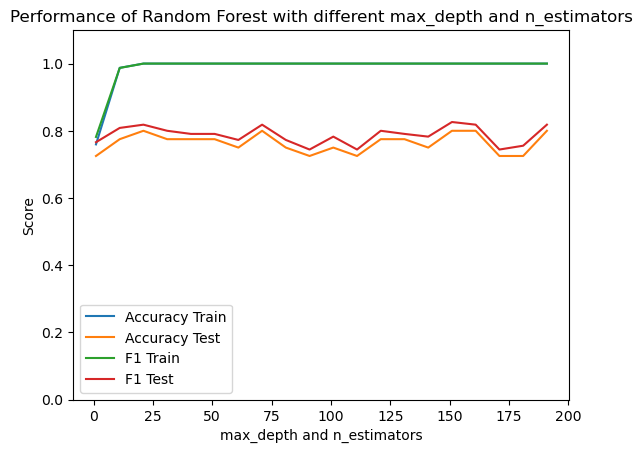

In [10]:
acc_scores_test = []
acc_scores_train = []
f1_scores_test = []
f1_scores_train = []

variable_range = range(1, 200, 10)
for num in variable_range:
    rf = RandomForestClassifier(n_estimators=num, max_depth=num)
    rf.fit(X_train, y_train["x"].ravel())
    y_pred = rf.predict(X_test)
    y_pred_train = rf.predict(X_train)
    
    acc_scores_test.append(accuracy_score(y_test, y_pred))
    acc_scores_train.append(accuracy_score(y_train, y_pred_train))
    
    
    f1_scores_train.append(f1_score(y_train, y_pred_train))
    f1_scores_test.append(f1_score(y_test, y_pred))
    
    

plt.plot(variable_range, acc_scores_train, label="Accuracy Train")
plt.plot(variable_range, acc_scores_test, label="Accuracy Test")
plt.plot(variable_range, f1_scores_train, label="F1 Train")
plt.plot(variable_range, f1_scores_test, label="F1 Test")
plt.xlabel("max_depth and n_estimators")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.title("Performance of Random Forest with different max_depth and n_estimators")
plt.legend()

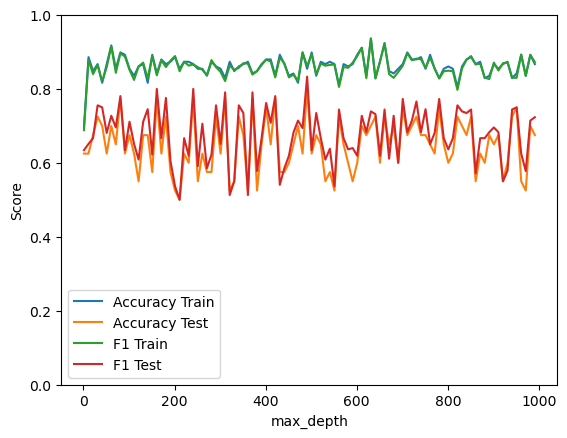

In [6]:
acc_scores_test = []
acc_scores_train = []
f1_scores_test = []
f1_scores_train = []

variable_range = range(1, 1000, 10)
for max_depth in variable_range:
    rf = RandomForestClassifier(n_estimators=1, max_depth=max_depth)
    rf.fit(X_train, y_train["x"].ravel())
    y_pred = rf.predict(X_test)
    y_pred_train = rf.predict(X_train)
    
    acc_scores_test.append(accuracy_score(y_test, y_pred))
    acc_scores_train.append(accuracy_score(y_train, y_pred_train))
    
    
    f1_scores_train.append(f1_score(y_train, y_pred_train))
    f1_scores_test.append(f1_score(y_test, y_pred))
    
    

plt.plot(variable_range, acc_scores_train, label="Accuracy Train")
plt.plot(variable_range, acc_scores_test, label="Accuracy Test")
plt.plot(variable_range, f1_scores_train, label="F1 Train")
plt.plot(variable_range, f1_scores_test, label="F1 Test")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend()

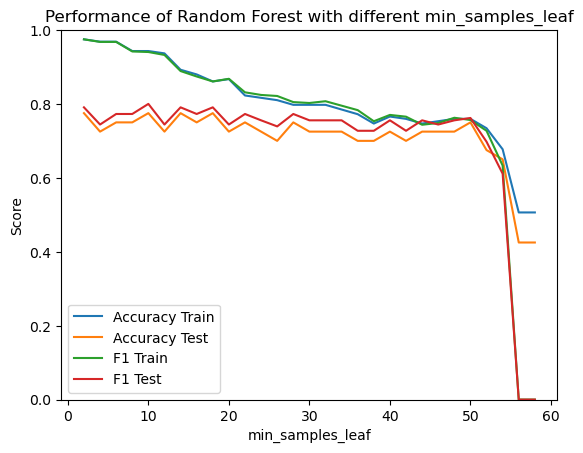

In [9]:
acc_scores_test = []
acc_scores_train = []
f1_scores_test = []
f1_scores_train = []

variable_range = range(2, 60, 2)
for min_samples_leaf in variable_range:
    rf = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=min_samples_leaf)
    rf.fit(X_train, y_train["x"].ravel())
    y_pred = rf.predict(X_test)
    y_pred_train = rf.predict(X_train)
    
    acc_scores_test.append(accuracy_score(y_test, y_pred))
    acc_scores_train.append(accuracy_score(y_train, y_pred_train))
    
    
    f1_scores_train.append(f1_score(y_train, y_pred_train))
    f1_scores_test.append(f1_score(y_test, y_pred))
    
    
    
    


plt.plot(variable_range, acc_scores_train, label="Accuracy Train")
plt.plot(variable_range, acc_scores_test, label="Accuracy Test")
plt.plot(variable_range, f1_scores_train, label="F1 Train")
plt.plot(variable_range, f1_scores_test, label="F1 Test")
plt.xlabel("min_samples_leaf")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Performance of Random Forest with different min_samples_leaf")
plt.legend()

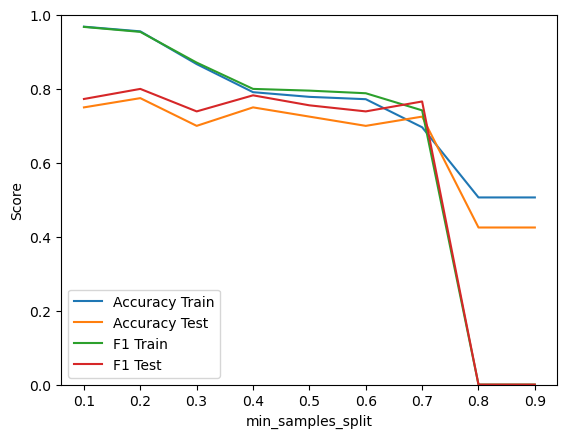

In [8]:
acc_scores_test = []
acc_scores_train = []
f1_scores_test = []
f1_scores_train = []

variable_range = [i/10 for i in range(1, 10)]

for min_samples_split in variable_range:
    rf = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=min_samples_split)
    rf.fit(X_train, y_train["x"].ravel())
    y_pred = rf.predict(X_test)
    y_pred_train = rf.predict(X_train)
    
    acc_scores_test.append(accuracy_score(y_test, y_pred))
    acc_scores_train.append(accuracy_score(y_train, y_pred_train))
    
    
    f1_scores_train.append(f1_score(y_train, y_pred_train))
    f1_scores_test.append(f1_score(y_test, y_pred))
    
    
    
    


plt.plot(variable_range, acc_scores_train, label="Accuracy Train")
plt.plot(variable_range, acc_scores_test, label="Accuracy Test")
plt.plot(variable_range, f1_scores_train, label="F1 Train")
plt.plot(variable_range, f1_scores_test, label="F1 Test")
plt.xlabel("min_samples_split")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend()